In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA

In [2]:
df_data_2d = pd.read_csv('homework_6/data_2d.csv')
df_mnist = pd.read_csv('homework_6/mnist.csv')

In [3]:
df_data_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [4]:
df_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
k = range(1,11)

def kmeans(df):
  distortions = []
  for k_ in k:
    kmeanModel = KMeans(n_clusters=k_)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
  return distortions

# data_2d

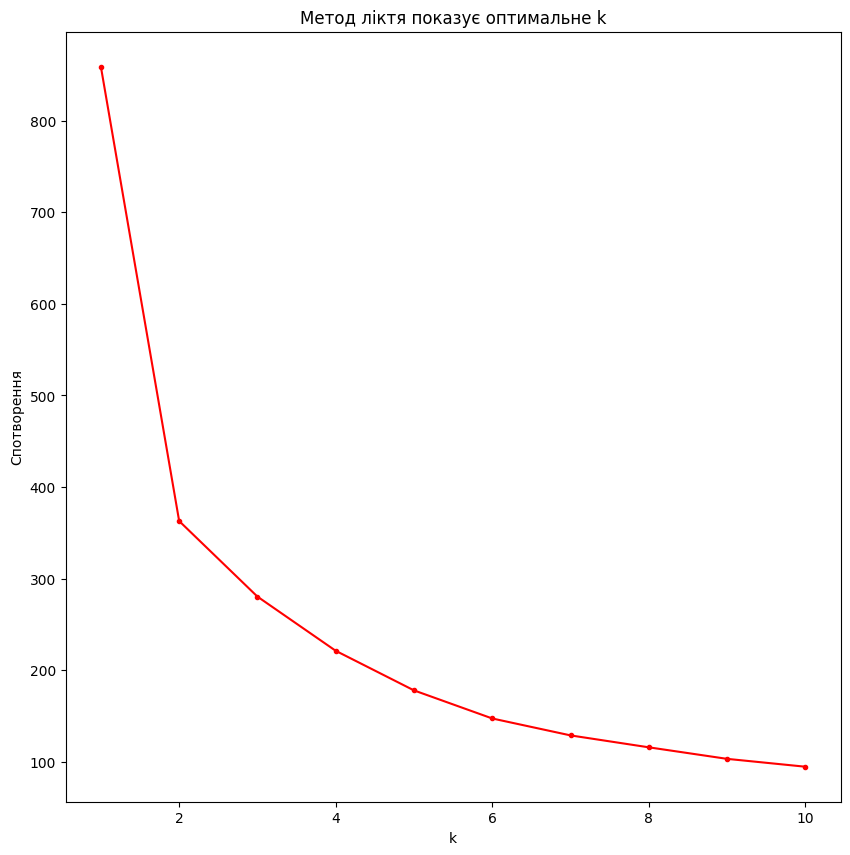

In [6]:
dist = kmeans(df_data_2d)
plt.figure(figsize=(10,10))
plt.plot(k, dist, '-r.')
plt.xlabel('k')
plt.ylabel('Спотворення')
plt.title('Метод ліктя показує оптимальне k')
plt.show()

Для датасету data_2d оптимальна кількість кластерів за методом ліктя становить 2 шт.

In [7]:
pca = PCA(n_components = 2)
data_2d = pca.fit_transform(df_data_2d)

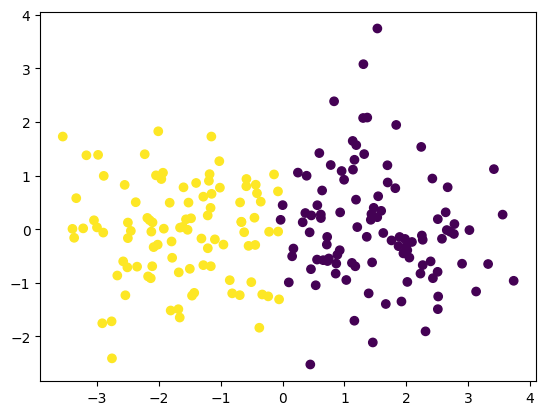

In [8]:
kmeans_data_2d = KMeans(n_clusters=2).fit(df_data_2d)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_data_2d.labels_)

# Mnist

In [9]:
pca = PCA(n_components = 2)
mnist = pca.fit_transform(df_mnist)

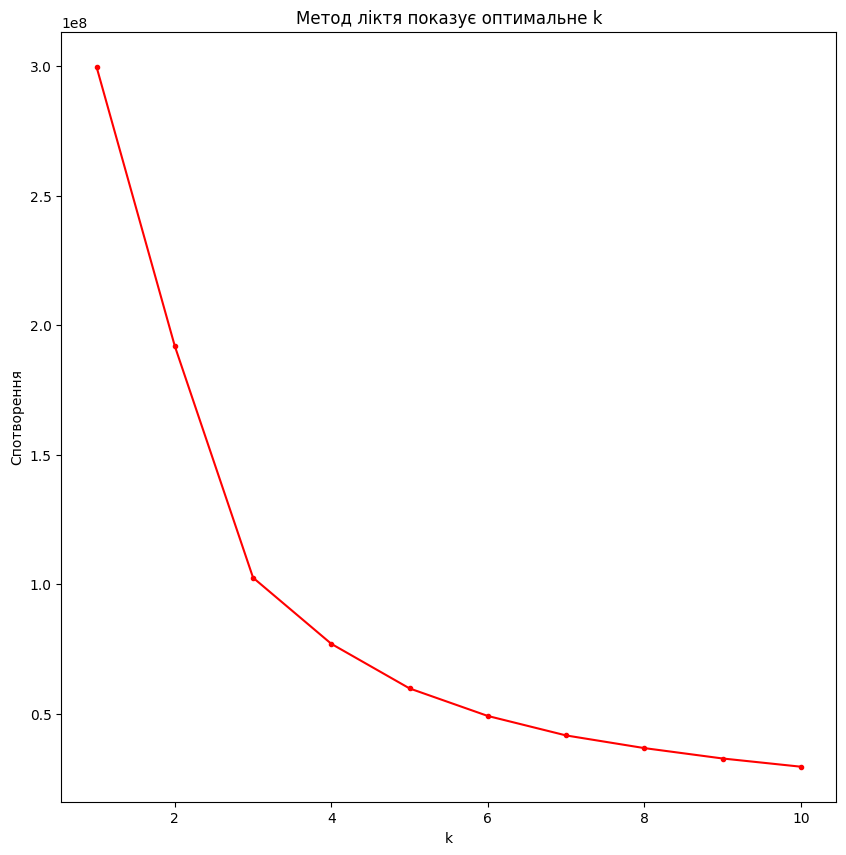

In [10]:
distortions = kmeans(mnist)
plt.figure(figsize=(10,10))
plt.plot(k, distortions, '-r.')
plt.xlabel('k')
plt.ylabel('Спотворення')
plt.title('Метод ліктя показує оптимальне k')
plt.show()
     

Для датасету mnist оптимальна кількість кластерів за методом ліктя становить 3 шт.

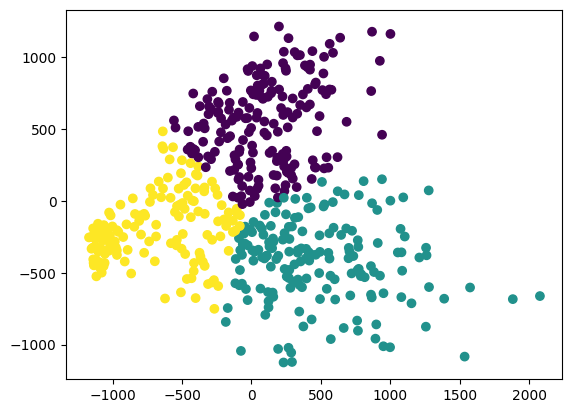

In [11]:
kmeans = KMeans(n_clusters=3).fit(mnist)
plt.scatter(mnist[:, 0], mnist[:, 1], c=kmeans.labels_)